In [1]:
# Importing Packages

import pandas as pd
from patsy import dmatrices
import numpy as np
# import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Reading the dataset
data_tests = pd.read_csv('Country-wise_data_testing_information/2nd May/S_korea_data.csv')
data_policy = pd.read_csv('Cases_and_policies_Country_wise/2nd May/S_Korea_Covid_Policies.csv')
data_stages = pd.read_csv('Data/2nd May/country_wise_stages.csv')

In [3]:
data_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          124 non-null    object
 1   location      124 non-null    object
 2   new_cases     124 non-null    int64 
 3   new_deaths    124 non-null    int64 
 4   total_cases   124 non-null    int64 
 5   total_deaths  124 non-null    int64 
 6   total_tests   124 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 6.9+ KB


In [4]:
data_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     124 non-null    int64  
 1   date                           124 non-null    object 
 2   location                       124 non-null    object 
 3   new_cases                      124 non-null    int64  
 4   new_deaths                     124 non-null    int64  
 5   total_cases                    124 non-null    int64  
 6   total_deaths                   124 non-null    int64  
 7   Date                           124 non-null    object 
 8   Lockdown                       124 non-null    float64
 9   Public_Health                  124 non-null    float64
 10  Governance_and_socio-economic  124 non-null    float64
 11  Humanitarian_exemption         124 non-null    float64
 12  Social_distancing              124 non-null    flo

In [5]:
data_stages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                346 non-null    int64  
 1   geoId                     346 non-null    object 
 2   countriesAndTerritories   346 non-null    object 
 3   Dates                     346 non-null    object 
 4   days_outbreak             346 non-null    int64  
 5   total_cases               346 non-null    int64  
 6   cases                     346 non-null    int64  
 7   total_deaths              346 non-null    int64  
 8   new_deaths                346 non-null    int64  
 9   total_cases_per_million   346 non-null    float64
 10  new_cases_per_million     346 non-null    float64
 11  total_deaths_per_million  346 non-null    float64
 12  new_deaths_per_million    346 non-null    float64
 13  total_tests               273 non-null    float64
 14  new_tests 

In [6]:
data_stages.tests_units.unique()

array([nan, 'tests performed', 'samples tested', 'samples',
       'cases tested'], dtype=object)

In [7]:
# Converting the datatype of dates to datetime
dates = pd.to_datetime(data_policy['date'], format = '%Y-%m-%d')

# Adding dates to the dataframe
data_policy['Date'] = dates

# Converting the datatype of dates to datetime
dates = pd.to_datetime(data_tests['date'], format = '%Y-%m-%d')

# Adding dates to the dataframe
data_tests['Date'] = dates

# Converting the datatype of dates to datetime
dates = pd.to_datetime(data_stages['Dates'], format = '%Y-%m-%d')

# Adding dates to the dataframe
data_stages['Date'] = dates



In [8]:
data_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          124 non-null    object        
 1   location      124 non-null    object        
 2   new_cases     124 non-null    int64         
 3   new_deaths    124 non-null    int64         
 4   total_cases   124 non-null    int64         
 5   total_deaths  124 non-null    int64         
 6   total_tests   124 non-null    int64         
 7   Date          124 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 7.9+ KB


In [9]:
data_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     124 non-null    int64         
 1   date                           124 non-null    object        
 2   location                       124 non-null    object        
 3   new_cases                      124 non-null    int64         
 4   new_deaths                     124 non-null    int64         
 5   total_cases                    124 non-null    int64         
 6   total_deaths                   124 non-null    int64         
 7   Date                           124 non-null    datetime64[ns]
 8   Lockdown                       124 non-null    float64       
 9   Public_Health                  124 non-null    float64       
 10  Governance_and_socio-economic  124 non-null    float64       
 11  Humanitarian_exempt

In [10]:
data_stages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                346 non-null    int64         
 1   geoId                     346 non-null    object        
 2   countriesAndTerritories   346 non-null    object        
 3   Dates                     346 non-null    object        
 4   days_outbreak             346 non-null    int64         
 5   total_cases               346 non-null    int64         
 6   cases                     346 non-null    int64         
 7   total_deaths              346 non-null    int64         
 8   new_deaths                346 non-null    int64         
 9   total_cases_per_million   346 non-null    float64       
 10  new_cases_per_million     346 non-null    float64       
 11  total_deaths_per_million  346 non-null    float64       
 12  new_deaths_per_million

In [11]:
grouped = data_stages.groupby('countriesAndTerritories')

In [12]:
grouped.countriesAndTerritories.unique()

countriesAndTerritories
Australia        [Australia]
Austria            [Austria]
China                [China]
Iceland            [Iceland]
India                [India]
New Zealand    [New Zealand]
South Korea    [South Korea]
Switzerland    [Switzerland]
Name: countriesAndTerritories, dtype: object

In [13]:
## Isolating the datasets for different countries into different dataframes
South_Korea = pd.DataFrame(grouped.get_group('South Korea'))

In [14]:
# Dataset Preprocessing before running the model
def dataset_preprocess_policy(df):
    
    # Setting date as the index of the dataframe
    df = df.set_index('Date')
    
    #Creating different columns with regressor variables
    ds = df.index.to_series()
    df['Day'] = ds.dt.day
    df['Month'] = ds.dt.month
    #df['Weekday'] = ds.dt.dayofweek
    df['Year'] = ds.dt.year
    
    # Dropping the text columns which have same entries at each row
    #df = df.drop(['Country', 'day', 'Country Name', 'Region','Unnamed: 0', ], axis = 1)
    df = df.drop(['Unnamed: 0','date','location','new_cases', 'new_deaths','total_cases','total_deaths'], axis = 1)
    df = df.drop(df.index[len(df)-1])
    
    #return the dataframe
    return(df)

In [15]:
# Dataset Preprocessing before running the model
def dataset_preprocess_tests(df):
    
    # Setting date as the index of the dataframe
    df = df.set_index('Date')
    
    #Creating different columns with regressor variables
#     ds = df.index.to_series()
#     df['Day'] = ds.dt.day
#     df['Month'] = ds.dt.month
#     df['Weekday'] = ds.dt.dayofweek
#     df['Year'] = ds.dt.year
    
    # Dropping the text columns which have same entries at each row
    df = df.drop(['date'], axis = 1)
#     df = df.drop([ 'countriesAndTerritories','geoId', 'dateRep', 'countryterritoryCode', 'cases', 'deaths'], axis = 1)
    #df = df.drop(df.index[len(df)-1])
    
    #return the dataframe
    return(df)

In [16]:
# Dataset Preprocessing before running the model
def data_stages_preprocess(df):
    
    # Setting date as the index of the dataframe
    df = df.set_index('Date')
    
    # Creating different columns with regressor variables
    ds = df.index.to_series()
#     df['Day'] = ds.dt.day
#     df['Month'] = ds.dt.month
    df['Weekday'] = ds.dt.dayofweek
#     df['Year'] = ds.dt.year
    
    # Dropping the text columns which have same entries at each row
    df = df.drop(['countriesAndTerritories', 'geoId', 'Dates','cases', 'new_deaths','total_cases','total_deaths','total_tests','new_tests','new_tests_per_thousand','total_tests_per_thousand','Unnamed: 0','tests_units'], axis = 1)
    df = df.drop(df.index[len(df)-1])
    
    #return the dataframe
    return(df)

In [17]:
data_stages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                346 non-null    int64         
 1   geoId                     346 non-null    object        
 2   countriesAndTerritories   346 non-null    object        
 3   Dates                     346 non-null    object        
 4   days_outbreak             346 non-null    int64         
 5   total_cases               346 non-null    int64         
 6   cases                     346 non-null    int64         
 7   total_deaths              346 non-null    int64         
 8   new_deaths                346 non-null    int64         
 9   total_cases_per_million   346 non-null    float64       
 10  new_cases_per_million     346 non-null    float64       
 11  total_deaths_per_million  346 non-null    float64       
 12  new_deaths_per_million

In [18]:
data_policy = dataset_preprocess_policy(data_policy)
data_tests = dataset_preprocess_tests(data_tests)
data_stages = data_stages_preprocess(South_Korea)

In [19]:
data_stages.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2020-02-20 to 2020-04-13
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   days_outbreak             47 non-null     int64  
 1   total_cases_per_million   47 non-null     float64
 2   new_cases_per_million     47 non-null     float64
 3   total_deaths_per_million  47 non-null     float64
 4   new_deaths_per_million    47 non-null     float64
 5   rolling_std               47 non-null     float64
 6   Stages                    47 non-null     int64  
 7   Components                47 non-null     int64  
 8   Weekday                   47 non-null     int64  
dtypes: float64(5), int64(4)
memory usage: 3.7 KB


In [20]:
merge = pd.merge(data_tests,data_policy, how='inner', left_index=True, right_index=True)

In [30]:
merge = pd.merge(data_stages, merge, how = 'inner', left_index = True, right_index=True)

In [31]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2020-02-20 to 2020-04-13
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   days_outbreak                  47 non-null     int64  
 1   total_cases_per_million        47 non-null     float64
 2   new_cases_per_million          47 non-null     float64
 3   total_deaths_per_million       47 non-null     float64
 4   new_deaths_per_million         47 non-null     float64
 5   rolling_std                    47 non-null     float64
 6   Stages                         47 non-null     int64  
 7   Components                     47 non-null     int64  
 8   Weekday                        47 non-null     int64  
 9   location                       47 non-null     object 
 10  new_cases                      47 non-null     int64  
 11  new_deaths                     47 non-null     int64  
 12  total_cases                    4

In [22]:
merge_updated = pd.merge(merge,data_stages, how='inner', left_index=True, right_index=True)

In [23]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2019-12-31 to 2020-05-01
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   location                       123 non-null    object 
 1   new_cases                      123 non-null    int64  
 2   new_deaths                     123 non-null    int64  
 3   total_cases                    123 non-null    int64  
 4   total_deaths                   123 non-null    int64  
 5   total_tests                    123 non-null    int64  
 6   Lockdown                       123 non-null    float64
 7   Public_Health                  123 non-null    float64
 8   Governance_and_socio-economic  123 non-null    float64
 9   Humanitarian_exemption         123 non-null    float64
 10  Social_distancing              123 non-null    float64
 11  Movement_restrictions          123 non-null    float64
 12  Day                            

In [24]:
merge_updated = merge_updated.reset_index()

In [25]:
len(merge_updated)

47

In [26]:
Days_since_start = np.arange(1,len(merge_updated)+1)
merge_updated['days_completed'] = Days_since_start

In [27]:
merge_updated.head()

,Date,location,new_cases,new_deaths,total_cases,total_deaths,total_tests,Lockdown,Public_Health,Governance_and_socio-economic,...,days_outbreak,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,rolling_std,Stages,Components,Weekday,days_completed
0,2020-02-20,South Korea,34,0,80,0,1146,0.0,0.0,0.0,...,1,1.560,0.663,0.000,0.000,0.001536,1,0,3,1
1,2020-02-21,South Korea,75,1,155,1,1750,0.0,0.0,0.0,...,2,3.023,1.463,0.020,0.020,0.002845,1,0,4,2
2,2020-02-22,South Korea,190,1,345,2,2655,0.0,0.0,0.0,...,3,6.729,3.706,0.039,0.020,0.007502,2,2,5,3
3,2020-02-23,South Korea,256,3,601,5,4805,0.0,0.0,0.0,...,4,11.722,4.993,0.098,0.059,0.008497,2,2,6,4
4,2020-02-24,South Korea,161,2,762,7,3012,0.0,0.0,0.0,...,5,14.863,3.140,0.137,0.039,0.004516,2,2,0,5


In [28]:
merge_updated.to_csv('Data/2nd May/South_Korea_Covid.csv')

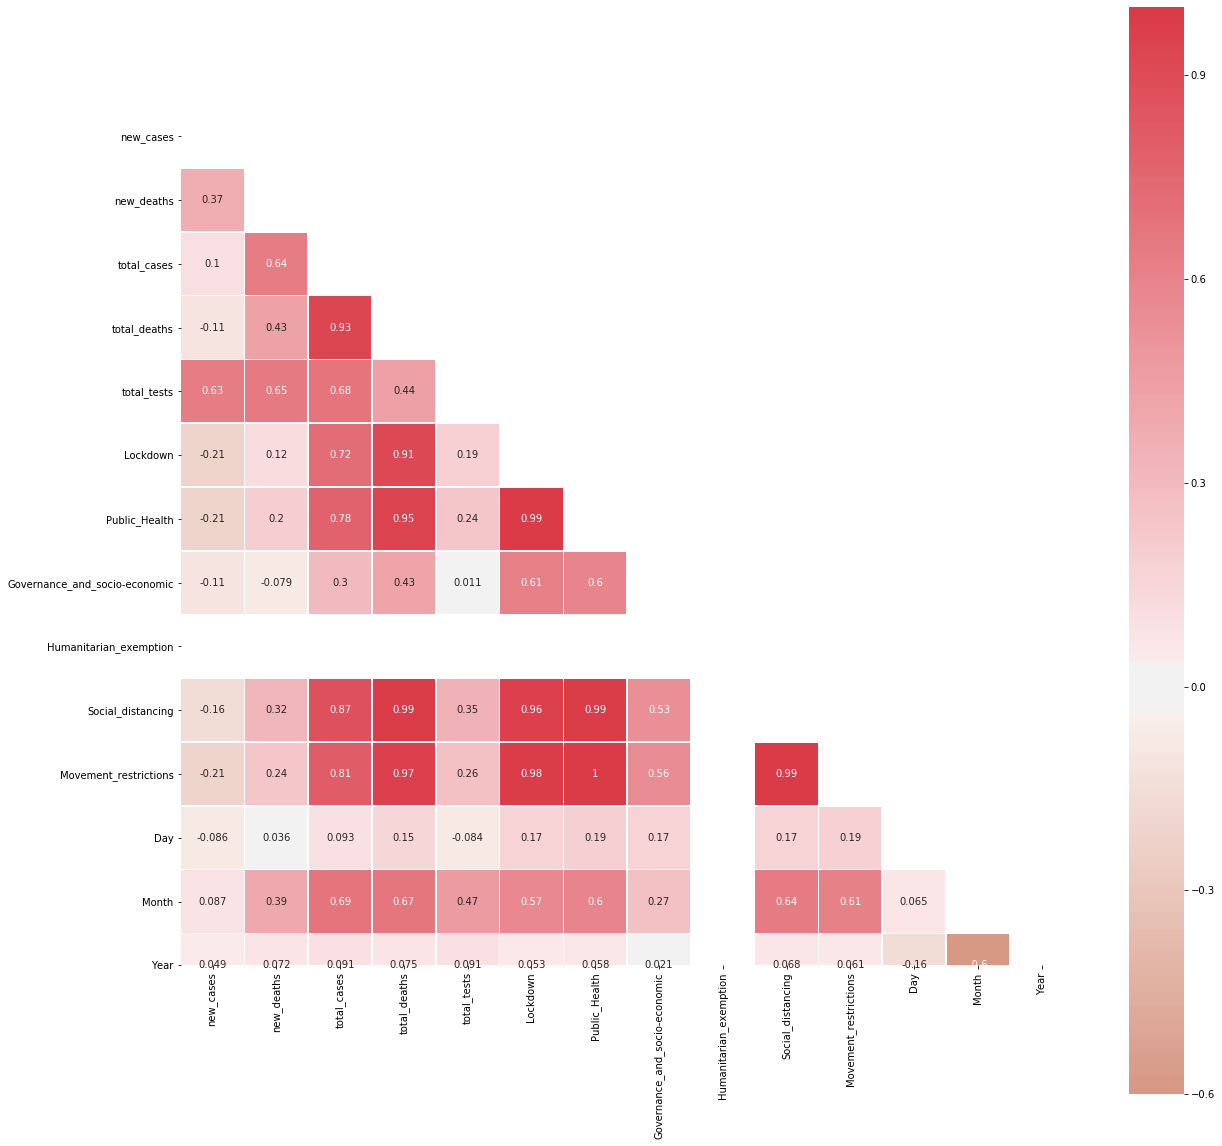

In [29]:
# Compute the correlation matrix
corr = merge.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 40))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(22, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})